In [5]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load_digits() is a dictionary. The image is 
# contained in the key "data"
df = pd.DataFrame(load_digits()["data"])
df.shape

(1797, 64)

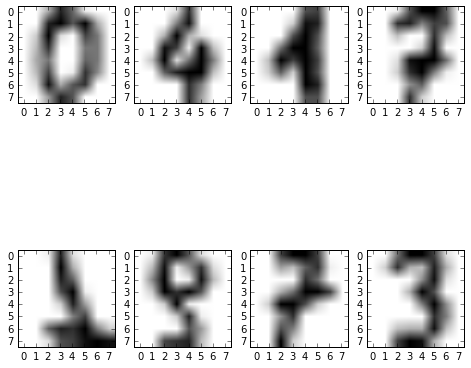

In [7]:
# Plotting multiple images
%matplotlib inline
w = 10
h = 8
fig=plt.figure(figsize = (8, 8))
columns = 4
rows = 2
indexes = [0,100,200,300,1000,1100,1200,1300]

for i in range(1, columns*rows+1):
    img = df.iloc[indexes[i-1]].values.reshape(8,8)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray_r")
plt.show()

In [8]:
# Targets
targets = pd.DataFrame(load_digits()["target"])
targets.shape

(1797, 1)

**KNN Classification**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size = 0.2, 
                                                    random_state=42, stratify=targets)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
def train(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train, y_train)
    return knn

def test():
    knn.score(X_test, y_test)
    
n_neighbors = [1,2,3,4,5,6,7,8,9]
    
train_accuracies = []
test_accuracies = []
    
def cross_validate():
    kf = KFold(4, shuffle=True, random_state=1)
    for i in n_neighbors:
        model = train(i)
        train_acc = cross_val_score(model, X_train, y_train, 
                                    scoring="accuracy", cv = kf)
        train_accuracies.append(train_acc)
        
        test_acc = cross_val_score(model, X_test, y_test, 
                                    scoring="accuracy", cv = kf)
        test_accuracies.append(test_acc)
    print(test_accuracies)
    return train_accuracies


In [21]:
from sklearn.model_selection import cross_val_score, KFold
cross_validate()

[array([0.95555556, 0.98888889, 0.93333333, 0.94444444]), array([0.95555556, 0.93333333, 0.91111111, 0.93333333]), array([0.93333333, 0.96666667, 0.86666667, 0.92222222]), array([0.94444444, 0.93333333, 0.86666667, 0.93333333]), array([0.93333333, 0.93333333, 0.85555556, 0.93333333]), array([0.92222222, 0.93333333, 0.86666667, 0.92222222]), array([0.92222222, 0.93333333, 0.86666667, 0.92222222]), array([0.93333333, 0.94444444, 0.86666667, 0.94444444]), array([0.94444444, 0.92222222, 0.84444444, 0.92222222])]


[array([0.98611111, 0.98607242, 0.98050139, 0.98050139]),
 array([0.98333333, 0.98050139, 0.97771588, 0.98328691]),
 array([0.98611111, 0.99164345, 0.97493036, 0.98885794]),
 array([0.98333333, 0.98607242, 0.96935933, 0.98885794]),
 array([0.98888889, 0.98328691, 0.97214485, 0.98885794]),
 array([0.98055556, 0.97493036, 0.96657382, 0.98050139]),
 array([0.97222222, 0.98050139, 0.96657382, 0.98328691]),
 array([0.975     , 0.98050139, 0.97214485, 0.97493036]),
 array([0.975     , 0.98050139, 0.96935933, 0.98328691])]

In [22]:
train_accuracies[0]

array([0.98611111, 0.98607242, 0.98050139, 0.98050139])

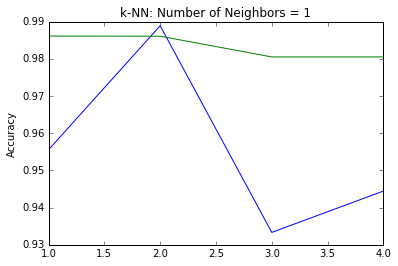

In [25]:
# Generate plot
plt.title('k-NN: Number of Neighbors = 1')
plt.plot([1,2,3,4], test_accuracies[0])#, label = 'Testing Accuracy')
plt.plot([1,2,3,4], train_accuracies[0])#, label = 'Training Accuracy')
plt.legend()
#plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Similarly do plotting for other values also.

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

**One hidden layer**

In [32]:
# Train MLPs with different number of neurons in hidden layer and find accuracies for each
neurons = [8,16,32,64,128,256]
accuracies = []
for val in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(val,), activation='logistic')
    mlp.fit(X_train, y_train)
    nn_predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, nn_predictions)
    accuracies.append(accuracy)

In [33]:
accuracies

[0.9111111111111111,
 0.9611111111111111,
 0.9861111111111112,
 0.9777777777777777,
 0.9833333333333333,
 0.9888888888888889]

**Two hidden layers**

In [35]:
# Train MLPs with different number of neurons in hidden layer and find accuracies for each
neurons = [64,128]
accuracies = []
for val in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(val,val,), activation='logistic')
    mlp.fit(X_train, y_train)
    nn_predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, nn_predictions)
    accuracies.append(accuracy)

In [36]:
accuracies

[0.9722222222222222, 0.9833333333333333]

Doesn't make much of a difference. We can see that the models have started to overfit for a bit.

In [ ]:
# 6-fold with 3 hidden layers
# 1 - [10,10,10]
# 2 - [64,64,64]
# 